In [12]:
import pandas as pd
import numpy as np
file_path ='./cafedata/gyeongnam-pricedata.csv'
df = pd.read_csv(file_path)
df.head()

,뚜레쥬르 지점,뚜레쥬르 거제수월,뚜레쥬르 거창스카이,뚜레쥬르 장유내덕,뚜레쥬르 장유석봉,뚜레쥬르 장유신문,뚜레쥬르 진영이진,뚜레쥬르 사천카이,뚜레쥬르 사천정동,뚜레쥬르 양산석산,...,뚜레쥬르 부산대연,뚜레쥬르 동래허브스카이,뚜레쥬르 부산동의대역,뚜레쥬르 부산개금백병원,뚜레쥬르 부산학장본점,뚜레쥬르 부산서대신역,뚜레쥬르 부산동아대,뚜레쥬르 부산남천,뚜레쥬르 부산대청로,뚜레쥬르 해운대수비교차로
0,마늘 단짝 고구마,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,...,4900.0,4900.0,4900.0,NaN,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,...,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0
2,BELT 샌드위치,NaN,6900.0,7300.0,6900.0,6900.0,6900.0,6900.0,6900.0,NaN,...,NaN,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,NaN,6900.0,7000.0
3,BLT콥 샐러드,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,NaN,NaN
4,쉬림프 에그 샐러드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import re

def categorize_menu(df):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    df['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(df['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                df.loc[idx, '카테고리'] = category
                break
    
    return df

def analyze_categories_by_store(df):
    # 매장별 카테고리별 기본 통계
    stores = df.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        df[store] = pd.to_numeric(df[store], errors='coerce')
        
        temp = df.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    df = pd.read_csv(filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return df, pivot_table

# 파일 처리 및 결과 생성
df, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(df.head())
########################################################################################################################

storeinfo_filepath='./뚜레쥬르_매장정보_경상남도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '경상남도 XX시' 추출
        match = re.match(r'부산광역시 \w+구', address) or re.match(r'부산광역시 \w+군', address) or re.match(r'경상남도\s+\w+시', address) or re.match(r'경상남도\s+\w+군', address)

        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    df = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return df, result

# 실제 파일 경로로 호출
df, result = process_bakery_data('./cafedata/gyeongnam-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_경상남도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 거제수월,경상남도 거제시,경남,3050.0,4202.0,7166.7,NaN,5027.3,4600.0,3450.0,2933.3,3116.7
1,뚜레쥬르 거창스카이,경상남도 거창군,경남,3250.0,4339.4,7040.0,8400.0,4977.8,4600.0,3233.3,3100.0,2800.0
2,뚜레쥬르 경남함안,경상남도 함안군,경남,2671.4,4502.8,7160.0,NaN,5000.0,4600.0,3240.0,2933.3,2850.0
3,뚜레쥬르 기장교리,부산광역시 기장군,경남,2671.4,3825.0,6950.0,NaN,4666.7,4600.0,2350.0,NaN,2750.0
4,뚜레쥬르 동래허브스카이,부산광역시 동래구,경남,3571.4,4145.9,7166.7,NaN,5245.5,4600.0,3240.0,2933.3,3650.0
5,뚜레쥬르 마산산호마린,경상남도 창원시,경남,2700.0,4032.7,7142.9,NaN,5111.1,4933.3,3675.0,3100.0,3116.7
6,뚜레쥬르 부산개금백병원,부산광역시 부산진구,경남,2810.0,4300.0,7150.0,NaN,4212.5,4300.0,3360.0,2933.3,3200.0
7,뚜레쥬르 부산남산,부산광역시 금정구,경남,2722.2,4171.4,NaN,NaN,5222.2,4600.0,3675.0,2933.3,3180.0
8,뚜레쥬르 부산남천,부산광역시 수영구,경남,2885.7,4111.5,7240.0,7400.0,4900.0,4600.0,3760.0,2400.0,2750.0
9,뚜레쥬르 부산대연,부산광역시 남구,경남,3354.5,4183.3,7166.7,NaN,5090.0,4600.0,3525.0,3100.0,3180.0


In [16]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_gyeongnam/시별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,부산광역시 해운대구,4756.737500
1,경상남도 창원시,4752.912500
2,경상남도 김해시,4729.475000
3,경상남도 양산시,4677.233333
4,경상남도 거창군,4675.137500
5,부산광역시 서구,4664.987500
6,부산광역시 중구,4649.593750
7,경상남도 통영시,4632.825000
8,부산광역시 부산진구,4516.387500
9,부산광역시 수영구,4491.962500


In [19]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean().round(2)

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_gyeongnam/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
경상남도 거제시,3050.00,7166.70,NaN,5027.30,4600.00,3450.00,2933.30,3116.70
경상남도 거창군,3250.00,7040.00,8400.0,4977.80,4600.00,3233.30,3100.00,2800.00
경상남도 김해시,2990.18,7271.42,8500.0,4966.10,4683.32,3501.02,2933.32,2990.42
경상남도 사천시,2898.35,7094.65,NaN,5114.45,4600.00,3697.50,2900.00,3340.00
경상남도 양산시,2588.87,7170.63,8700.0,5007.27,4600.00,3384.43,2744.43,3222.23
경상남도 진주시,2930.10,7095.00,NaN,5342.15,4766.65,3493.35,3016.65,3365.00
경상남도 창원시,2870.00,7188.10,8300.0,5112.70,4766.65,3537.50,3100.00,3148.35
경상남도 통영시,2900.00,7050.00,8300.0,4925.00,4600.00,3314.30,2933.30,3040.00
경상남도 함안군,2874.60,7050.00,NaN,5066.65,4766.65,3286.65,2966.65,3000.00


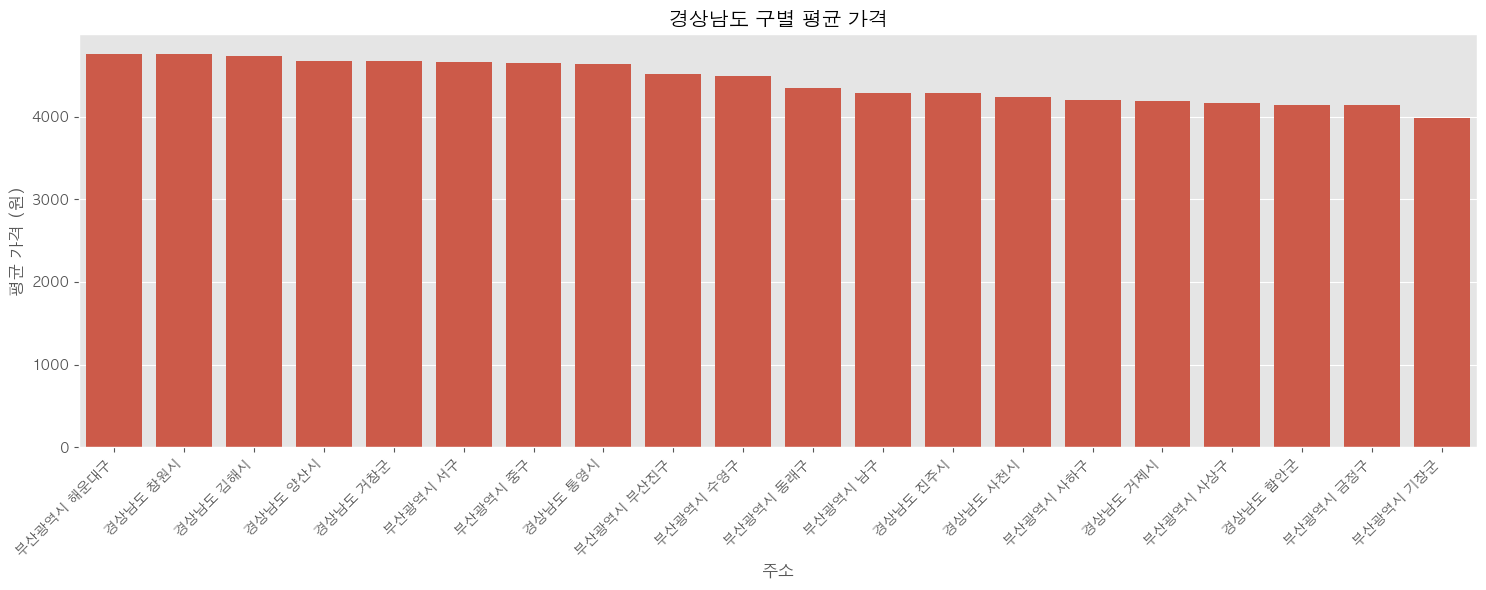

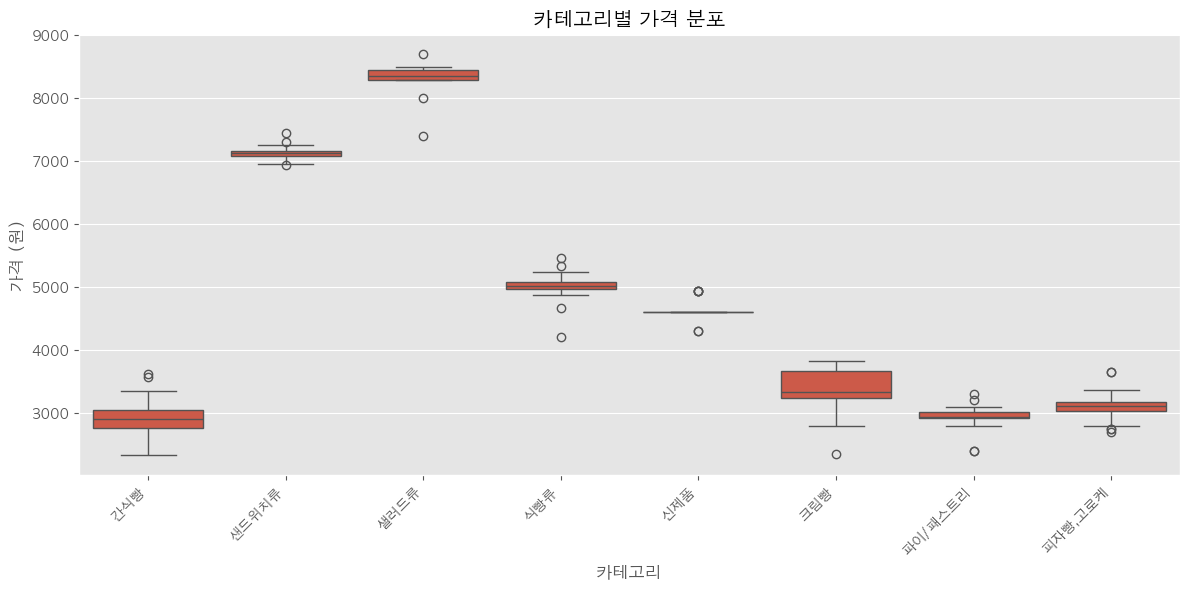

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('경상남도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

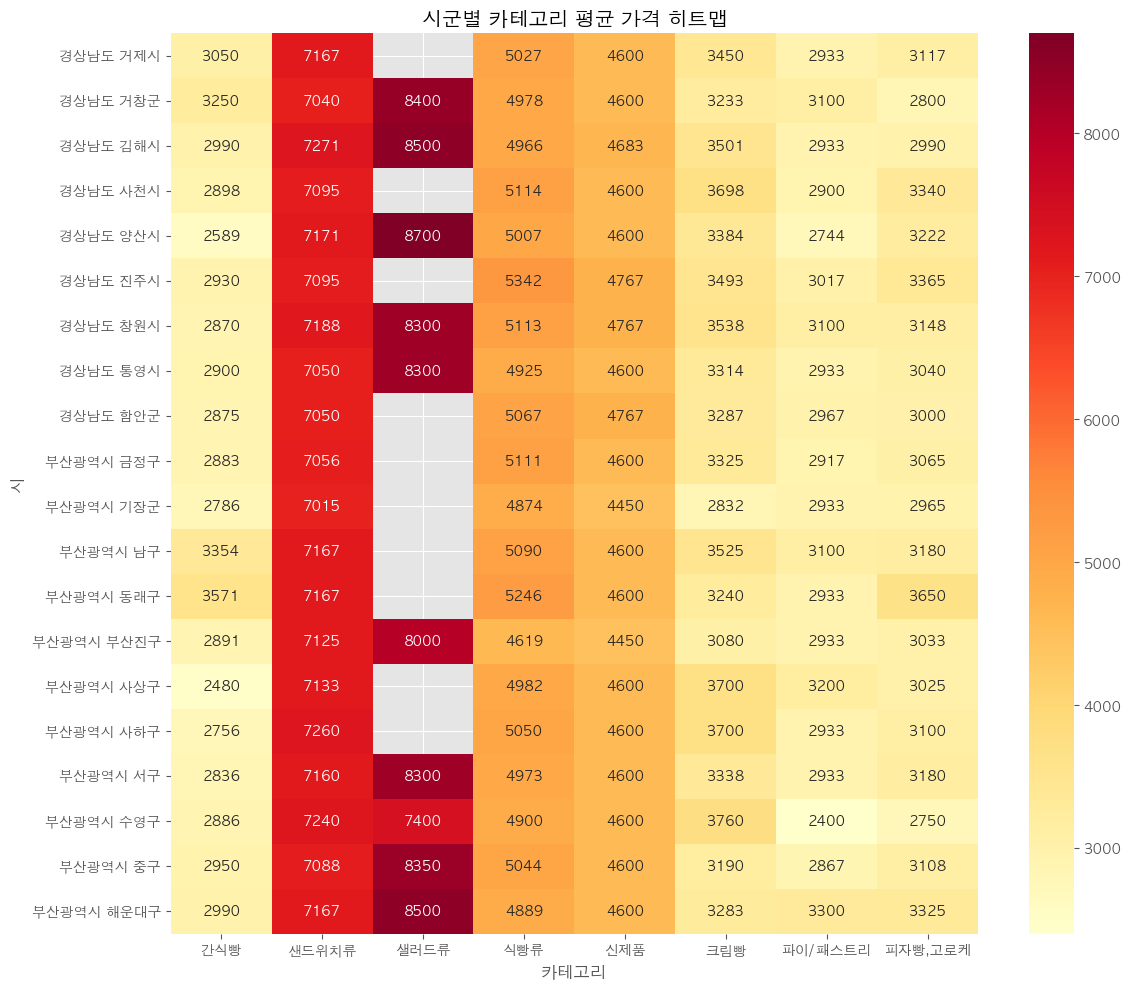

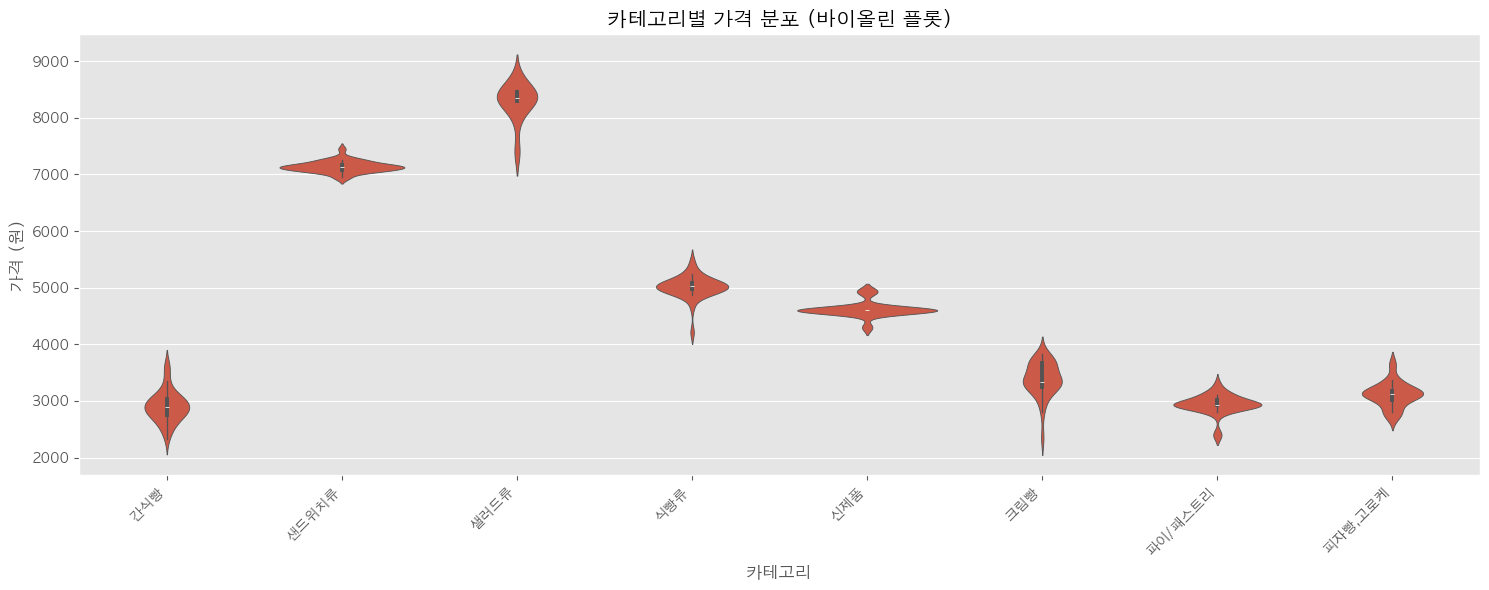

In [21]:

# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
            구분       평균_빵가격
0          거제시  4192.000000
1          거창군  4675.137500
2          김해시  4729.475000
3          사천시  4234.992857
4          양산시  4677.233333
5          진주시  4286.985714
6          창원시  4752.912500
7          통영시  4632.825000
8          함안군  4144.457143
9    부산광역시 금정구  4136.557143
10   부산광역시 기장군  3979.342857
11    부산광역시 남구  4288.028571
12   부산광역시 동래구  4343.842857
13  부산광역시 부산진구  4516.387500
14   부산광역시 사상구  4160.014286
15   부산광역시 사하구  4199.842857
16    부산광역시 서구  4664.987500
17   부산광역시 수영구  4491.962500
18    부산광역시 중구  4649.593750
19  부산광역시 해운대구  4756.737500

전처리 후 아파트 가격 데이터:
            구분      매매   전세
1          거제시   500.0  367
2          거창군   608.0  391
3          고성군   327.0  217
4          김해시   704.0  555
5          남해군   375.0  220
6          밀양시   533.0  337
7          사천시   429.0  359
8          산청군   571.0  353
9          양산시   732.0  496
10         의령군   672.0  448
11         진주시   844.0  654
12         창녕군   488.0  364
13   창원시 마산

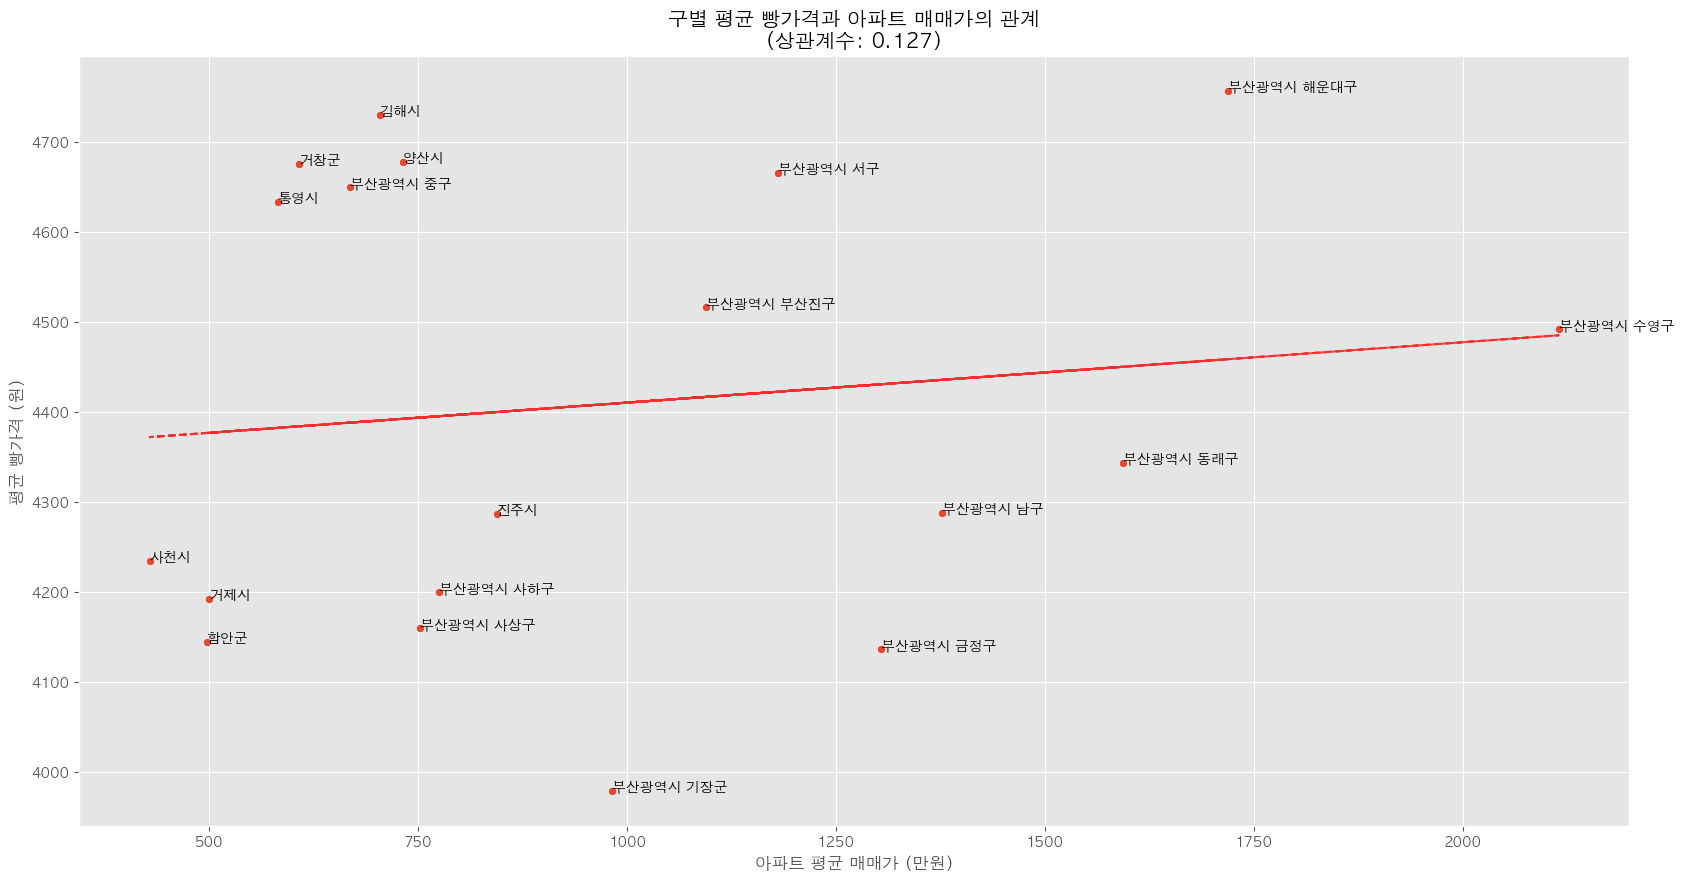

In [22]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '경기도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('경상남도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_gyeongnam/gyeongnam_APT_PRICE.csv')
# '경상남도'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('경상남도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거


# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")

In [23]:
gbile_path ='./cafedata/gyeongbuk-pricedata.csv'
gbdf = pd.read_csv(gbile_path)
gbdf.head()

,뚜레쥬르 지점,뚜레쥬르 경산옥곡,뚜레쥬르 경산정평,뚜레쥬르 경주중앙,뚜레쥬르 경주충효서라벌중앙,뚜레쥬르 구미형곡중앙,뚜레쥬르 김천부곡센트럴,뚜레쥬르 문경중앙,뚜레쥬르 안동정하,뚜레쥬르 옥동호반,...,뚜레쥬르 월배삼정,뚜레쥬르 현풍테크노,뚜레쥬르 동대구해모로,뚜레쥬르 동대구더샵디어엘로,뚜레쥬르 복현GS,뚜레쥬르 침산명성푸르지오,뚜레쥬르 서대구센트럴자이,뚜레쥬르 대구신평리,뚜레쥬르 수성3가캐슬,뚜레쥬르 대구달성공원역
0,마늘 단짝 고구마,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,...,5300.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,NaN,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,...,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,NaN,4300.0
2,BELT 샌드위치,NaN,6900.0,NaN,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,...,7300.0,6900.0,NaN,6900.0,7100.0,8000.0,6900.0,6900.0,NaN,6900.0
3,BLT콥 샐러드,NaN,NaN,8500.0,8500.0,NaN,NaN,8500.0,NaN,8500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,NaN,8500.0
4,쉬림프 에그 샐러드,NaN,NaN,NaN,NaN,NaN,NaN,10500.0,NaN,NaN,...,11000.0,NaN,NaN,NaN,10500.0,NaN,10500.0,NaN,NaN,NaN


In [28]:
# import re

def categorize_menu(gbdf):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    gbdf['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(gbdf['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                gbdf.loc[idx, '카테고리'] = category
                break
    
    return gbdf

def analyze_categories_by_store(gbdf):
    # 매장별 카테고리별 기본 통계
    stores = gbdf.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        gbdf[store] = pd.to_numeric(gbdf[store], errors='coerce')
        
        temp = gbdf.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    gbdf = pd.read_csv(filepath)
    
    # 카테고리 지정
    gbdf = categorize_menu(gbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(gbdf)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return gbdf, pivot_table

# 파일 처리 및 결과 생성
gbdf, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(gbdf.head())
########################################################################################################################

storeinfo_filepath='./adress_process/뚜레쥬르_매장정보_경상북도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '전라남도 XX시' 추출
        match = re.match(r'경상북도\s+\w+시', address) or re.match(r'경상북도\s+\w+군', address) or re.match(r'대구광역시\s+\w+구', address) or re.match(r'대구광역시\s+\w+군', address) or re.match(r'울산광역시\s+\w+구', address) or re.match(r'울산광역시\s+\w+군', address)
        
        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    gbdf = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    gbdf = categorize_menu(gbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(gbdf)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return gbdf, result

# 실제 파일 경로로 호출
gbdf, result = process_bakery_data('./cafedata/gyeongbuk-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_경상북도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)

result.to_csv('anal_gyeongbuk/시별_카테고리_평균가격.csv', encoding='utf-8-sig')


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 경북울진,경상북도 울진군,경북,2642.9,4125.0,7100.0,NaN,5190.9,4600.0,3357.1,2933.3,3100.0
1,뚜레쥬르 경북청도,경상북도 청도군,경북,2987.5,4076.7,7187.5,9400.0,5055.6,4600.0,3814.3,3066.7,3025.0
2,뚜레쥬르 경산옥곡,경상북도 경산시,경북,2480.0,3921.6,7300.0,NaN,4942.9,4600.0,3675.0,3200.0,3025.0
3,뚜레쥬르 경산정평,경상북도 경산시,경북,3100.0,3862.8,7160.0,8333.3,5185.7,4600.0,3514.3,2933.3,3116.7
4,뚜레쥬르 경주중앙,경상북도 경주시,경북,2887.5,3963.6,8500.0,8500.0,5150.0,4600.0,3833.3,2966.7,3120.0
5,뚜레쥬르 경주충효서라벌중앙,경상북도 경주시,경북,2825.0,4314.6,7311.1,NaN,5162.5,4600.0,3500.0,2933.3,3650.0
6,뚜레쥬르 구미형곡중앙,경상북도 구미시,경북,2940.0,4329.4,7177.8,NaN,4976.9,4600.0,3580.0,2800.0,3300.0
7,뚜레쥬르 김천부곡센트럴,경상북도 김천시,경북,3100.0,4029.3,7128.6,NaN,4788.9,4600.0,3800.0,2933.3,3025.0
8,뚜레쥬르 대구달성공원역,대구광역시 중구,경북,2616.7,3950.0,7283.3,8500.0,4930.0,4600.0,3250.0,2933.3,3283.3
9,뚜레쥬르 대구대봉,대구광역시 남구,경북,3177.8,4261.9,7044.4,9966.7,5215.4,4600.0,3600.0,3233.3,3316.7


In [29]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_gyeongbuk/시군별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,대구광역시 남구,5019.287500
1,대구광역시 달서구,4974.658333
2,경상북도 청도군,4892.075000
3,대구광역시 북구,4888.000000
4,경상북도 경주시,4877.462500
5,경상북도 문경시,4872.837500
6,경상북도 영천시,4804.062500
7,대구광역시 서구,4800.418750
8,경상북도 영주시,4764.075000
9,울산광역시 중구,4732.693750


In [30]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean().round(2)

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_gyeongbuk/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
경상북도 경산시,2790.00,7230.00,8333.30,5064.30,4600.00,3594.65,3066.65,3070.85
경상북도 경주시,2856.25,7905.55,8500.00,5156.25,4600.00,3666.65,2950.00,3385.00
경상북도 구미시,2940.00,7177.80,NaN,4976.90,4600.00,3580.00,2800.00,3300.00
경상북도 김천시,3100.00,7128.60,NaN,4788.90,4600.00,3800.00,2933.30,3025.00
경상북도 문경시,2872.70,7320.00,8925.00,4860.00,4933.30,3825.00,3066.70,3180.00
경상북도 안동시,3153.80,7072.50,8100.00,5164.95,4766.65,3435.70,3100.00,3046.45
경상북도 영주시,3250.00,7088.90,8500.00,4926.70,4933.30,3337.50,2933.30,3142.90
경상북도 영천시,2657.10,7320.00,8450.00,4908.30,4600.00,3857.10,3600.00,3040.00
경상북도 예천군,2620.00,7066.70,NaN,4983.30,4600.00,3680.00,2800.00,3333.30


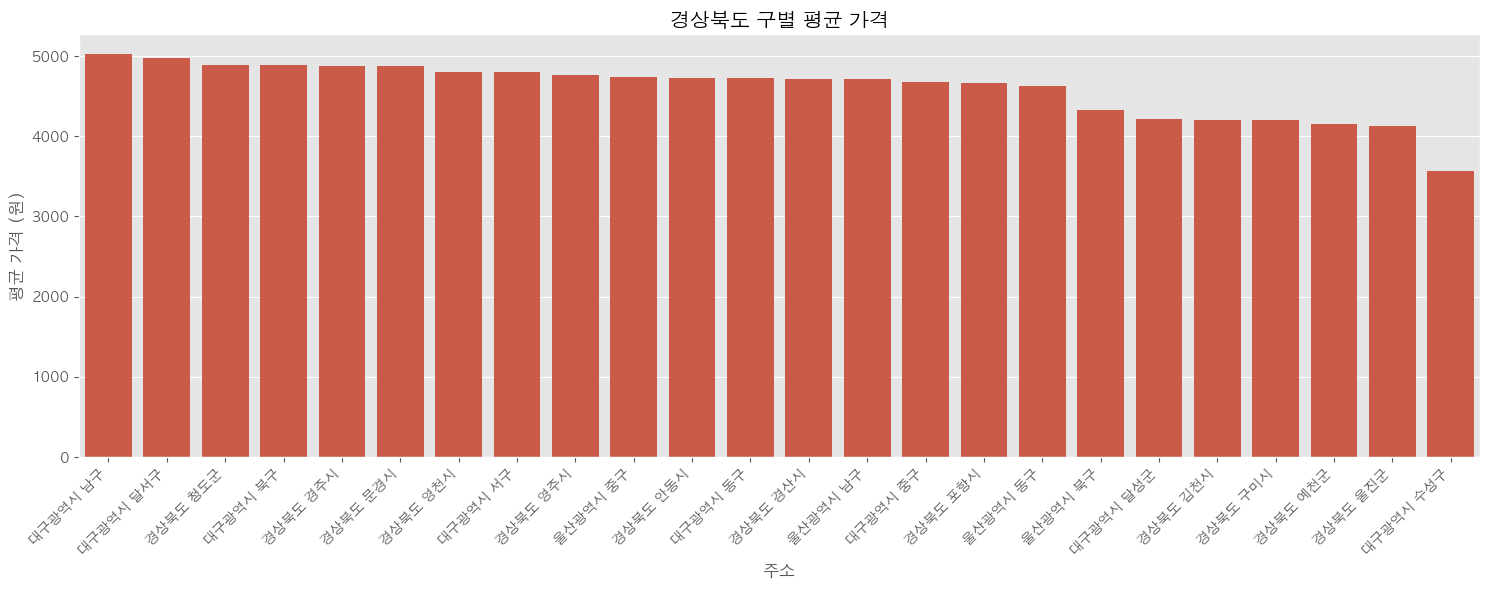

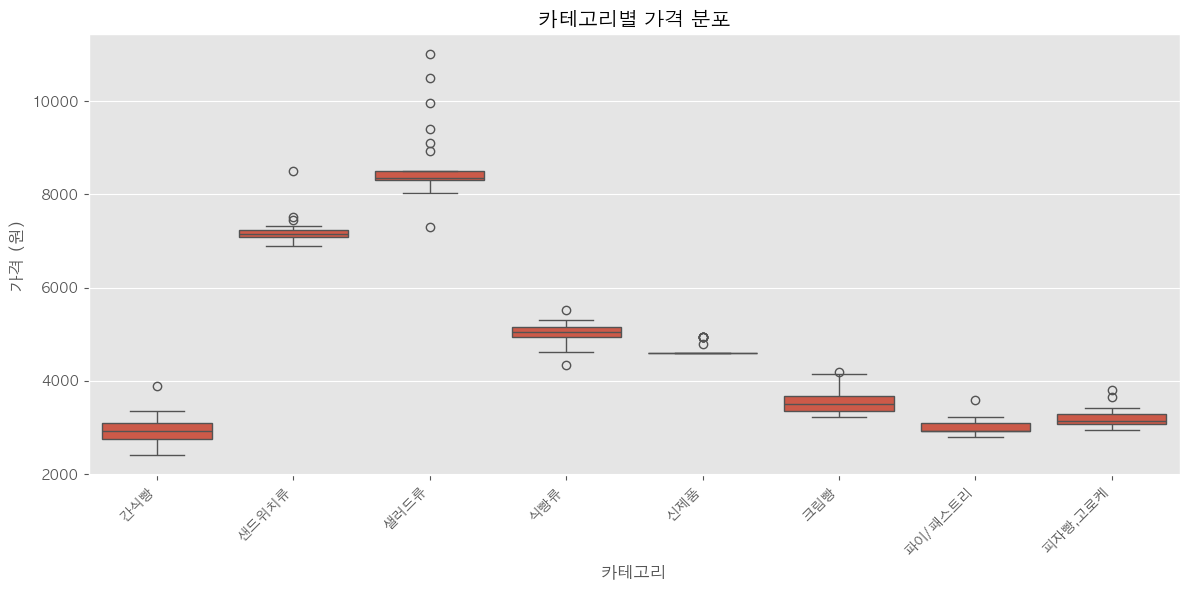

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('경상북도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

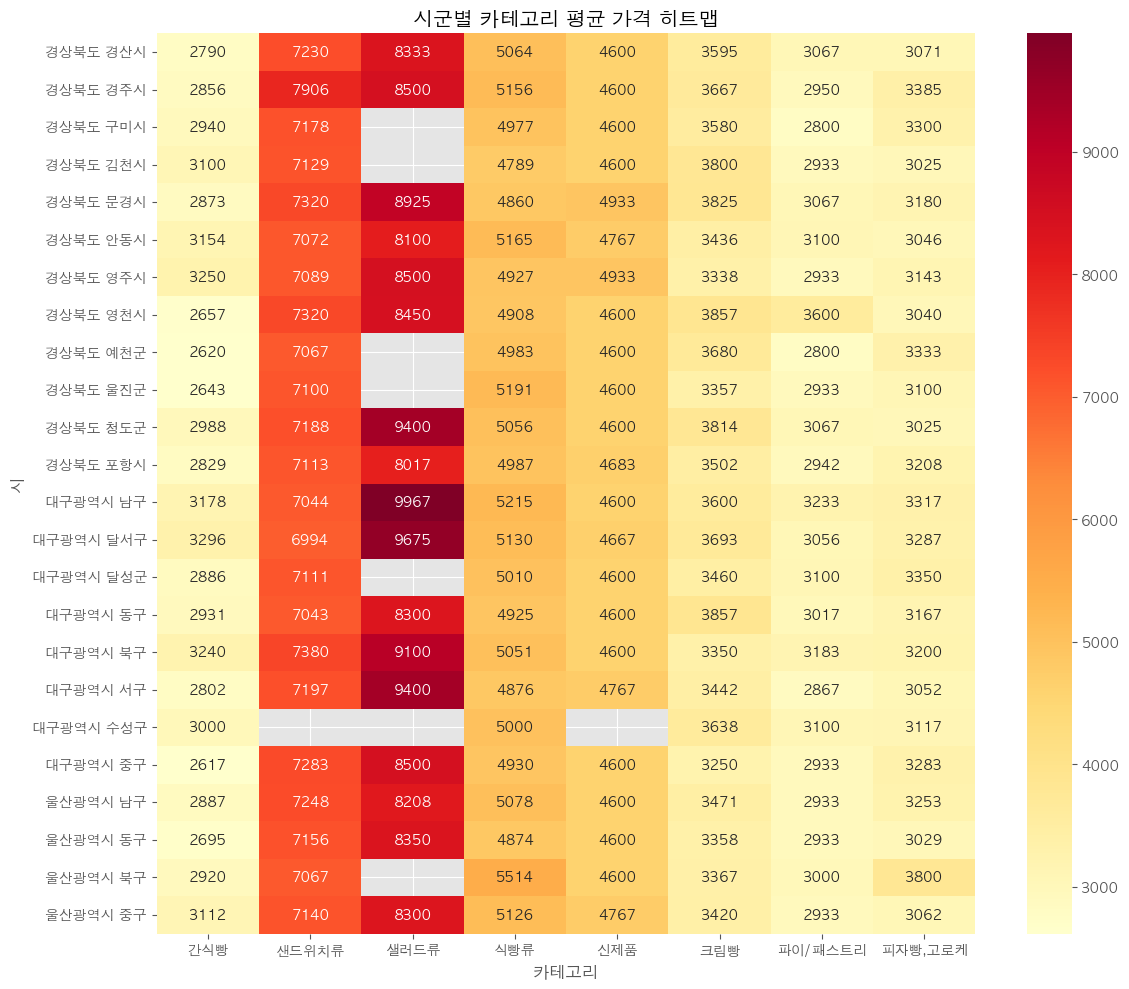

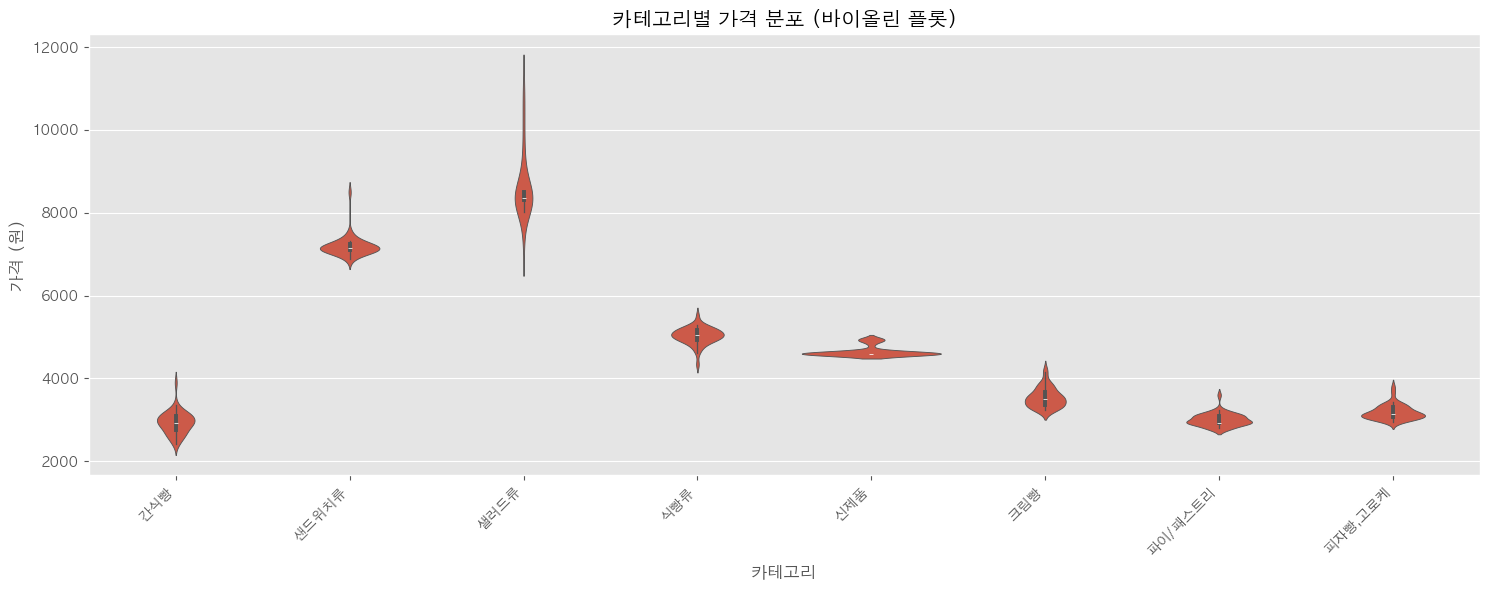

In [32]:
# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
           구분       평균_빵가격
0         경산시  4718.718750
1         경주시  4877.462500
2         구미시  4196.385714
3         김천시  4196.542857
4         문경시  4872.837500
5         안동시  4730.006250
6         영주시  4764.075000
7         영천시  4804.062500
8         예천군  4154.757143
9         울진군  4132.028571
10        청도군  4892.075000
11        포항시  4660.258333
12   대구광역시 남구  5019.287500
13  대구광역시 달서구  4974.658333
14  대구광역시 달성군  4216.685714
15   대구광역시 동구  4729.862500
16   대구광역시 북구  4888.000000
17   대구광역시 서구  4800.418750
18  대구광역시 수성구  3570.840000
19   대구광역시 중구  4674.575000
20   울산광역시 남구  4710.027083
21   울산광역시 동구  4624.370833
22   울산광역시 북구  4323.957143
23   울산광역시 중구  4732.693750

전처리 후 아파트 가격 데이터:
           구분      매매   전세
1         경산시   678.0  492
2         경주시   639.0  484
3         고령군   439.0  297
4         구미시   592.0  465
5         김천시   546.0  439
6         문경시   608.0  420
7         봉화군   407.0  294
8         상주시   451.0  286
9         성주군   415.0  288
10        안동시   50

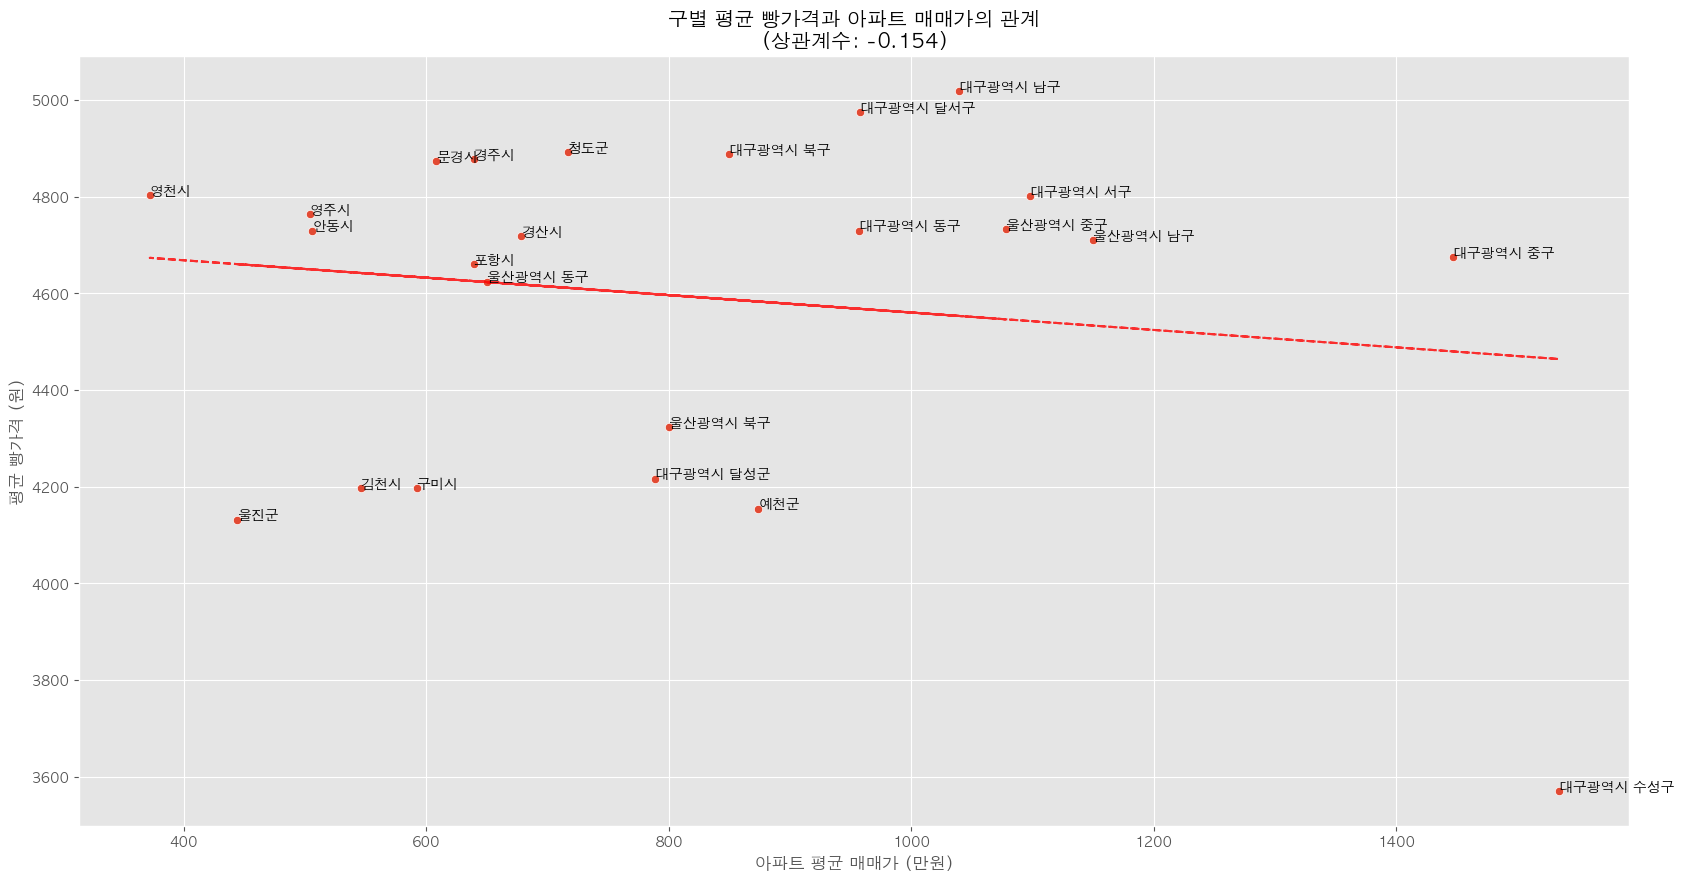

In [39]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '경상북도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('경상북도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_gyeongbuk/gyeongbuk_APT_PRICE.csv')
# '경상북도'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('경상북도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거
# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")